Data 300: Statistical Machine Learning

Sam Campbell

Homework 4 – Sampling and Comparing Multiple Models (20 points)

This is a programming only assignment.

Due: Tuesday 7th November.

For this assignment you will be comparing the performance of two classification models on the same data set. Before you fit and evaluate any models, you are going to create samples of the data based on the sampling techniques we learnt in class. We will be using the data set from HW 3 (found here ).

1. Create three samples of the data:

a. The first should be created by oversampling the minority class so that the number of observations of the minority and majority class are the same (18,000 for each class) and you have 36, 000 observations in total.

b. The second should be created by undersampling the majority class (2000 observations for each class) and you have 4000 observations in total. c. Use SMOTE to create the third data set. This is also an oversampling technique.

Make sure you save your datasets.

2. Fit a Logistic regression and Linear Discriminant Analysis (LDA) on all three datasets so that you have 6 model objects. A model for each of the three datasets you have created by using different sampling techniques.

3. Compare model performance on accuracy, recall, and precision. Report your findings.

4. Plot an AUC_ROC curve and choose the best model based on the curve.

5. Which model would you prefer? Explain.


In [1]:
import pandas as pd# v 1.5.3
import numpy as np # v 1.21.5
import sklearn as sk # v 1.3.2
import matplotlib.pyplot as plt # 3.6.3
import imblearn #0.11.0

from sklearn.linear_model import LogisticRegression # v 1.3.2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # v 1.3.2
from sklearn.metrics import precision_score, recall_score, accuracy_score # v 1.3.2
from sklearn.model_selection import train_test_split # v 1.3.2
from sklearn.metrics import roc_curve, roc_auc_score # v 1.3.2
from imblearn.over_sampling import SMOTE #0.11.0


Below I import the data and do some preliminary EDA

In [2]:
df = pd.read_csv('/Users/samcampbell/Downloads/loan_default_data_set.csv')

In [3]:
df.shape, df.columns, df.dtypes #Checking out the shape of the df, columns, and data types


((20000, 21),
 Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
        'Def_ind'],
       dtype='object'),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_currently_past_due      float64
 num_inq_12_month                     int64
 num_c

In [4]:
df.head() #Looking at the First 5 rows

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


In [5]:
df.tail() #Looking at the last 5 rows


,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0,0,0.535628,0.634712,0.527230,0.602345,0,NaN,high_school,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0,0,0.464774,0.450030,0.545108,NaN,1,NaN,high_school,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0,0,0.264544,0.340289,0.412155,NaN,0,157706.15810,college,0
19998,96742.36371,11743.262370,275,141,294,2,1,1,3009.387661,0,...,0,0,0.609226,0.582007,0.301612,0.697052,1,97387.97414,college,1
19999,107338.82070,7942.952546,325,195,302,0,0,0,0.000000,0,...,0,0,0.358067,0.435511,0.349246,NaN,0,165447.16380,college,0


In [6]:
df.describe() #checking out some basic metrics

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,num_card_inq_24_month,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,18042.000000,20000.000000,18441.000000,20000.000000
mean,107439.032714,12230.735330,280.710050,146.100300,285.12085,0.156550,0.029700,0.030000,352.496791,0.616050,1.053050,0.272950,0.164150,0.490867,0.484157,0.465007,0.550964,0.250000,166373.900129,0.100000
std,22365.573172,3060.432745,73.238059,38.603134,64.25718,0.469524,0.176407,0.170591,1784.459199,1.158533,2.035766,0.487094,0.376977,0.129604,0.122891,0.130913,0.128403,0.433024,33444.974846,0.300008
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000
25%,92212.563362,10151.128043,231.000000,120.000000,242.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403926,0.401141,0.377850,0.464195,0.000000,143504.239600,0.000000
50%,107711.034250,12238.862545,280.000000,146.000000,285.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490365,0.485525,0.464847,0.551765,0.000000,166462.899700,0.000000
75%,122751.428100,14286.417122,330.000000,172.000000,330.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.578311,0.567996,0.553581,0.638316,0.250000,188903.520800,0.000000
max,200000.000000,25000.000000,560.000000,300.000000,550.00000,5.000000,2.000000,1.000000,35000.000000,10.000000,18.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300000.000000,1.000000


In [7]:
df.isna().sum() # There are some missing vals


tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month                      0
num_card_inq_24_month                 0
num_card_12_month                     0
num_auto_ 36_month                    0
uti_open_card                         0
pct_over_50_uti                       0
uti_max_credit_line                   0
pct_card_over_50_uti               1958
ind_XYZ                               0
rep_income                         1559
rep_education                         1
Def_ind                               0
dtype: int64

In [8]:
df.Def_ind.value_counts() # Inbalanced Classes

0    18000
1     2000
Name: Def_ind, dtype: int64

In [9]:
df = pd.get_dummies(df, columns= ['rep_education'])
# getting dummy variables to be able to run our regressions later

When I dropped NaNs after over/underfitting I noticed that my classes became unbalanced again so I decided to drop them here to hopefully benefit the models.

In [10]:
df = df.dropna()


In [11]:
minorityDF = df[df.Def_ind == 1] # splitting into minority class

In [12]:
majorityDF = df[df.Def_ind == 0] # splitting into majority class

In [13]:
majorityDF.Def_ind.value_counts() #using this for n_samples to balance them

0    14956
Name: Def_ind, dtype: int64

In [14]:
overSampleMinority = sk.utils.resample(minorityDF,n_samples=14956) 

In [15]:
OverSample = pd.concat([overSampleMinority,majorityDF])

In [16]:
OverSample.Def_ind.value_counts() #balanced!

1    14956
0    14956
Name: Def_ind, dtype: int64

In [17]:
minorityDF.Def_ind.value_counts() #using this for n_samples

1    1697
Name: Def_ind, dtype: int64

In [18]:
underSampleMajority = sk.utils.resample(majorityDF,n_samples=1697)

In [19]:
underSample = pd.concat([underSampleMajority , minorityDF])

In [20]:
underSample.Def_ind.value_counts() #balanced!

1    1697
0    1697
Name: Def_ind, dtype: int64

In [21]:
X = df.drop("Def_ind", axis=1)
y = df["Def_ind"]

sm=SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X, y)

smote_df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

print(smote_df["Def_ind"].value_counts())

#my smote df is balnced and oversampled

1    14956
0    14956
Name: Def_ind, dtype: int64


In [22]:
smote_df.describe() #checking out some metrics of my smote df

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education_college,rep_education_graduate,rep_education_high_school,rep_education_other,Def_ind
count,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,...,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000
mean,104555.913494,11720.225460,270.440225,141.731379,277.301484,0.226531,0.050047,0.053423,853.595945,0.668862,...,0.511295,0.492354,0.580203,0.156827,166368.048454,0.488600,0.072446,0.188653,0.004012,0.500000
std,24552.707404,3600.455918,67.915695,35.692156,59.447113,0.592065,0.223497,0.224880,2778.298435,1.134779,...,0.118206,0.124423,0.122054,0.363643,33005.798643,0.499878,0.259229,0.391240,0.063212,0.500008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87745.544317,9227.544633,225.000000,118.000000,238.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.433740,0.412023,0.500527,0.000000,144040.913066,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104000.601853,11575.818035,269.000000,141.000000,275.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.515642,0.495111,0.584011,0.000000,166640.715950,0.000000,0.000000,0.000000,0.000000,0.500000
75%,121851.208876,14191.386305,315.000000,165.000000,317.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.591767,0.576082,0.664201,0.000000,188411.996850,1.000000,0.000000,0.000000,0.000000,1.000000
max,200000.000000,25000.000000,550.000000,300.000000,550.000000,5.000000,2.000000,1.000000,35000.000000,10.000000,...,0.929435,1.000000,1.000000,1.000000,300000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Below I run my logistic regressions for my oversampled, undersampled and SMOTE dataframes as well as check out accuracy precision and recall.

In [23]:
Y = OverSample.Def_ind

X = OverSample.loc[:, OverSample.columns != "Def_ind"]

X_train_overLog, X_test_overLog, Y_train_overLog, Y_test_overLog = train_test_split(X, Y, test_size=0.25, random_state=5)


reg_overLog = LogisticRegression()


reg_overLog.fit(X_train_overLog, Y_train_overLog)



print(reg_overLog.intercept_, reg_overLog.coef_, reg_overLog.score(X_test_overLog, Y_test_overLog)) 


[1.63120222e-06] [[ 4.26891587e-06 -7.84626258e-05 -1.35663251e-03 -5.32115381e-04
  -9.56540963e-04  8.97515437e-06  1.29660774e-06  1.41105696e-06
   3.18943236e-04  3.64483572e-05  5.60387994e-05  3.44809717e-06
   2.11661355e-07  7.77995634e-06  6.17082681e-06  6.15293060e-06
   6.70733954e-06 -3.93642918e-06  5.63286550e-06 -1.37206397e-06
  -7.32179817e-07  3.80548039e-06 -7.00343862e-08]] 0.6454934474458411


In [24]:
Y_pred_OverLog = reg_overLog.predict(X_test_overLog)


In [25]:
accuracy = accuracy_score(Y_test_overLog, Y_pred_OverLog)
precision = precision_score(Y_test_overLog, Y_pred_OverLog, average = 'macro')
recall = recall_score(Y_test_overLog, Y_pred_OverLog, average = 'macro')
print('Accuracy score oversample logistic: ',accuracy)
print('Precision score oversample logistic: ',precision)
print('Recall score oversample logistic: ',recall)

Accuracy score oversample logistic:  0.6454934474458411
Precision score oversample logistic:  0.664951853824866
Recall score oversample logistic:  0.6472627898187512


In [26]:
Y = underSample.Def_ind

X = underSample.loc[:, underSample.columns != "Def_ind"]

X_train_underLog, X_test_underLog, Y_train_underLog, Y_test_underLog = train_test_split(X, Y, test_size=0.25, random_state=5)


reg_underLog = LogisticRegression()

reg_underLog.fit(X_train_underLog, Y_train_underLog)


print(reg_underLog.intercept_, reg_underLog.coef_, reg_underLog.score(X_test_underLog, Y_test_underLog)) 


[1.49580579e-06] [[ 6.06906446e-06 -1.00990342e-04 -1.23731101e-03 -4.87175065e-04
  -1.04693886e-03  8.30874196e-06  1.41418072e-06  1.29718393e-06
   2.69982489e-04  3.41700066e-05  5.60178326e-05  4.56703147e-06
   1.39345967e-06  7.28049936e-06  6.12438279e-06  6.26577108e-06
   6.30981848e-06 -4.65035021e-06  6.28694053e-06 -1.28512297e-06
  -1.55641472e-06  4.37218653e-06 -3.48430547e-08]] 0.6266195524146054


In [27]:
Y_pred_underLog = reg_underLog.predict(X_test_underLog)


In [28]:
accuracy = accuracy_score(Y_test_underLog, Y_pred_underLog)
precision = precision_score(Y_test_underLog, Y_pred_underLog, average = 'macro')
recall = recall_score(Y_test_underLog, Y_pred_underLog, average = 'macro')
print('Accuracy score undersample logistic: ',accuracy)
print('Precision score undersample logistic: ',precision)
print('Recall score undersample logistic: ',recall)

Accuracy score undersample logistic:  0.6266195524146054
Precision score undersample logistic:  0.6303715830439747
Recall score undersample logistic:  0.6242435178502026


In [29]:
Y = smote_df.Def_ind

X = smote_df.loc[:, smote_df.columns != "Def_ind"]

X_train_smLog, X_test_smLog, Y_train_smLog, Y_test_smLog = train_test_split(X, Y, test_size=0.25, random_state=5)


reg_smLog = LogisticRegression()


reg_smLog.fit(X_train_smLog, Y_train_smLog)



print(reg_smLog.intercept_, reg_smLog.coef_, reg_smLog.score(X_test_smLog, Y_test_smLog)) 

[2.03973887e-06] [[ 5.49028777e-06 -9.81808077e-05 -1.60594462e-03 -6.07387500e-04
  -1.08575229e-03 -2.73287773e-06 -8.64499874e-07 -9.29545072e-07
   3.19626696e-04  1.79545284e-05  3.97043511e-05 -1.17527529e-05
  -9.60244252e-06  8.91339337e-06  7.12866181e-06  7.02739795e-06
   7.65332861e-06 -1.60190493e-05  7.07951208e-06 -2.00690565e-05
  -8.32521696e-06 -1.19696527e-05 -5.77375809e-07]] 0.6416154051885531


In [30]:
Y_pred_smLog = reg_smLog.predict(X_test_smLog)

In [31]:
accuracy = accuracy_score(Y_test_smLog, Y_pred_smLog)
precision = precision_score(Y_test_smLog, Y_pred_smLog, average = 'macro')
recall = recall_score(Y_test_smLog, Y_pred_smLog, average = 'macro')
print('Accuracy score SMOTE logistic: ',accuracy)
print('Precision score SMOTE logistic: ',precision)
print('Recall score SMOTE logistic: ',recall)

Accuracy score SMOTE logistic:  0.6416154051885531
Precision score SMOTE logistic:  0.6484417201340692
Recall score SMOTE logistic:  0.6403839862600629


Below I run my LDA models for my oversampled, undersampled and SMOTE dataframes as well as check out accuracy precision and recall.

In [32]:
Y2 = OverSample.Def_ind

X2 = OverSample.loc[:, OverSample.columns != "Def_ind"]

X2_train_overLDA, X2_test_overLDA, Y2_train_overLDA, Y2_test_overLDA = train_test_split(X2, Y2, test_size=0.3, random_state=5)


LDA_Model_over = LinearDiscriminantAnalysis()


LDA_Model_over.fit(X2_train_overLDA,Y2_train_overLDA)


print(LDA_Model_over.intercept_, LDA_Model_over.coef_, LDA_Model_over.score(X2_test_overLDA, Y2_test_overLDA))




[-1.24318884] [[-2.81558678e-06 -8.53408828e-05 -4.15685098e-03  4.67509102e-04
  -7.70481188e-04  9.77253443e-01  1.62885744e-01  3.40783096e-01
  -4.18881015e-05  3.86003439e-01 -8.46480946e-02  1.36316258e-01
  -5.31506949e-02  5.57682755e+00  5.96535182e-01  2.09633399e-01
  -1.93731118e-01 -3.33657058e-01  6.81580957e-07 -5.45266746e-02
  -9.11218521e-02  1.17109257e-01 -2.56412450e-01]] 0.721974593269445


In [33]:
Y2_Pred_over = LDA_Model_over.predict(X2_test_overLDA)


In [34]:
accuracy = accuracy_score(Y2_test_overLDA, Y2_Pred_over)
precision = precision_score(Y2_test_overLDA, Y2_Pred_over, average='macro')
recall = recall_score(Y2_test_overLDA, Y2_Pred_over, average = 'macro')
print('Accuracy score oversampled LDA: ',accuracy)
print('Precision score oversampled LDA: ',precision)
print('Recall score oversampled LDA: ',recall)

Accuracy score oversampled LDA:  0.721974593269445
Precision score oversampled LDA:  0.7223906606061345
Recall score oversampled LDA:  0.7220857930324156


In [35]:
Y2 = underSample.Def_ind

X2 = underSample.loc[:, underSample.columns != "Def_ind"]

X2_train_underLDA, X2_test_underLDA, Y2_train_underLDA, Y2_test_underLDA = train_test_split(X2, Y2, test_size=0.3, random_state=5)


LDA_Model_under = LinearDiscriminantAnalysis()


LDA_Model_under.fit(X2_train_underLDA,Y2_train_underLDA)


print(LDA_Model_under.intercept_, LDA_Model_under.coef_, LDA_Model_under.score(X2_test_underLDA, Y2_test_underLDA))


[-1.88591255] [[ 2.06826058e-06 -1.16561617e-04 -2.16274688e-03  9.70867157e-04
  -2.73899105e-03  9.88678921e-01  4.60559352e-01  3.13075477e-01
  -7.29656176e-05  2.57755517e-01 -3.03873143e-03  2.49253724e-01
   6.75116855e-02  4.32074477e+00  1.25214452e+00  1.30972930e+00
  -9.27781371e-02 -4.11157850e-01  1.51995426e-06 -2.82865717e-02
  -1.10931720e-01  8.35690789e-02  4.09515723e-01]] 0.7389597644749755


In [36]:
Y2_Pred_under = LDA_Model_under.predict(X2_test_underLDA)


In [37]:
accuracy = accuracy_score(Y2_test_underLDA, Y2_Pred_under)
precision = precision_score(Y2_test_underLDA, Y2_Pred_under, average='macro')
recall = recall_score(Y2_test_underLDA, Y2_Pred_under, average = 'macro')
print('Accuracy score undersampled LDA: ',accuracy)
print('Precision score undersampled LDA: ',precision)
print('Recall score undersampled LDA: ',recall)

Accuracy score undersampled LDA:  0.7389597644749755
Precision score undersampled LDA:  0.7398744666186526
Recall score undersampled LDA:  0.7386620179527681


In [38]:
Y2 = smote_df.Def_ind

X2 = smote_df.loc[:, underSample.columns != "Def_ind"]

X2_train_sm, X2_test_sm, Y2_train_sm, Y2_test_sm = train_test_split(X2, Y2, test_size=0.3, random_state=5)


LDA_Model_sm = LinearDiscriminantAnalysis()


LDA_Model_sm.fit(X2_train_sm,Y2_train_sm)


print(LDA_Model_sm.intercept_, LDA_Model_sm.coef_, LDA_Model_sm.score(X2_test_sm, Y2_test_sm))

[-0.10468946] [[-3.31586803e-06 -1.00247485e-04 -5.33600387e-03  6.06204774e-04
  -6.56915092e-04 -1.69731752e-01 -8.02515323e-02 -1.42264723e-01
   2.47185600e-04 -3.92526100e-02  1.36459118e-01 -7.63158967e-01
  -1.04342262e+00  6.34996886e+00  8.12638500e-01 -1.00801158e-01
  -6.66991905e-02 -1.53585343e+00  5.08285548e-07 -1.81082392e+00
  -1.25851483e+00 -2.34953892e+00  0.00000000e+00]] 0.7759081791843102


In [39]:
Y2_Pred_sm = LDA_Model_sm.predict(X2_test_sm)


In [40]:
accuracy = accuracy_score(Y2_test_sm, Y2_Pred_sm)
precision = precision_score(Y2_test_sm, Y2_Pred_sm, average='macro')
recall = recall_score(Y2_test_sm, Y2_Pred_sm, average = 'macro')
print('Accuracy score SMOTE LDA: ',accuracy)
print('Precision score SMOTE LDA: ',precision)
print('Recall score SMOTE LDA: ',recall)

Accuracy score SMOTE LDA:  0.7759081791843102
Precision score SMOTE LDA:  0.7773381678947611
Recall score SMOTE LDA:  0.7761714389912227


After looking at accuracy, precision and recall for all of my models it appears that the SMOTE LDA model has the best metrics across the board. In general the LDA models performed better on accuracy, precision, and recall as well. The oversampled and undersampled logisitic regressions did the worse of all six models. All models had scores between approximately 60 and 77 so all had some predictive power but nothing too particularly great.

Now I plot my AUC_ROC curves for all models.

In [41]:
y_score_overLog = reg_overLog.predict_proba(X_test_overLog)[:, 1]
y_score_underLog = reg_underLog.predict_proba(X_test_underLog)[:, 1]
y_score_smLog = reg_smLog.predict_proba(X_test_smLog)[:, 1]
y_score_overLDA = LDA_Model_over.predict_proba(X2_test_overLDA)[:, 1]
y_score_underLDA = LDA_Model_under.predict_proba(X2_test_underLDA)[:, 1]
y_score_smLDA = LDA_Model_sm.predict_proba(X2_test_sm)[:, 1]


In [42]:
fpr_olog, tpr_olog, thresholds_olog = roc_curve(Y_test_overLog, y_score_overLog)
auc_olog = roc_auc_score(Y_test_overLog, y_score_overLog)

fpr_ulog, tpr_ulog, thresholds_ulog = roc_curve(Y_test_underLog, y_score_underLog)
auc_ulog = roc_auc_score(Y_test_underLog, y_score_underLog)

fpr_smlog, tpr_smlog, thresholds_smlog = roc_curve(Y_test_overLog, y_score_overLog)
auc_smlog = roc_auc_score(Y_test_smLog, y_score_smLog)


fpr_oLDA, tpr_oLDA, thresholds_oLDA = roc_curve(Y2_test_overLDA, y_score_overLDA)
auc_oLDA = roc_auc_score(Y2_test_overLDA, y_score_overLDA)

fpr_uLDA, tpr_uLDA, thresholds_uLDA = roc_curve(Y2_test_underLDA, y_score_underLDA)
auc_oLDA = roc_auc_score(Y2_test_underLDA, y_score_underLDA)


fpr_smLDA, tpr_smLDA, thresholds_smLDA = roc_curve(Y2_test_sm, y_score_smLDA)
auc_smLDA = roc_auc_score(Y2_test_sm, y_score_smLDA)

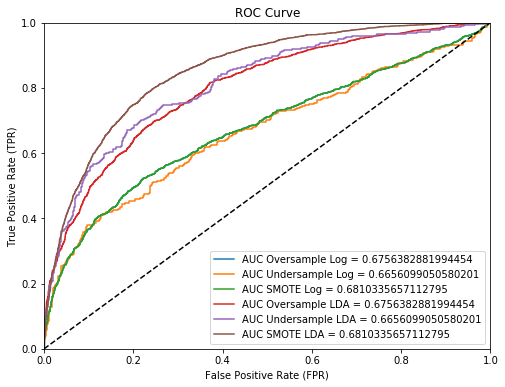

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_olog, tpr_olog, label=f'AUC Oversample Log = {auc_olog}')
plt.plot(fpr_ulog, tpr_ulog, label=f'AUC Undersample Log = {auc_ulog}')
plt.plot(fpr_smlog, tpr_smlog, label=f'AUC SMOTE Log = {auc_smlog}')
plt.plot(fpr_oLDA, tpr_oLDA, label=f'AUC Oversample LDA = {auc_olog}')
plt.plot(fpr_uLDA, tpr_uLDA, label=f'AUC Undersample LDA = {auc_ulog}')
plt.plot(fpr_smLDA, tpr_smLDA, label=f'AUC SMOTE LDA = {auc_smlog}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The best model on the AUC_ROC curve was the SMOTE LDA model. I would chose this model based on the curve.

Overall the SMOTE LDA model was the best in terms of accuracy, precision, recall, and based off the AUC_ROC curve. Based on these two metrics I would chose this model for this excersize. The SMOTE LDA also had the best r-squared compared to the other 5 models. It's important to keep in mind what we talked about in class however, SMOTE sampled dataframes don't have the best track record in real world more messy applications. But for this assignment it seems to have performed the best from the metrics we looked at.
